In [4]:
import pandas as pd

In [6]:
import wandb

# Connettiti al progetto
api = wandb.Api()

# Sostituisci con il tuo <entity>/<project>
runs = api.runs("vincenzo-civale-universi-degli-studi-di-firenze/vit-ucb-pruning3")

results = []

for run in runs:
    # Scarica la history (loss/accuracy per step)
    history = run.history(keys=["eval/loss", "eval/accuracy"])

    if history.empty:
        continue
    
    # Trova l'indice del minimo della loss
    min_loss_idx = history["eval/loss"].idxmin()
    
    # Recupera loss minima e accuracy corrispondente
    min_loss = history.loc[min_loss_idx, "eval/loss"]
    acc_at_min_loss = history.loc[min_loss_idx, "eval/accuracy"]
    
    results.append({
        "run_name": run.name,
        "min_val_loss": min_loss,
        "val_acc_at_min_loss": acc_at_min_loss
    })

df = pd.DataFrame(results)

# Salva in CSV
df.to_csv("wandb_results.csv", index=False)

    patch_kept  accuracy
2        0.010     0.841
8        0.011     0.893
7        0.015     0.898
6        0.030     0.905
4        0.050     0.875
5        0.070     0.889
3        0.100     0.894
1        0.300     0.886
9        0.800     0.857
10       0.900     0.850


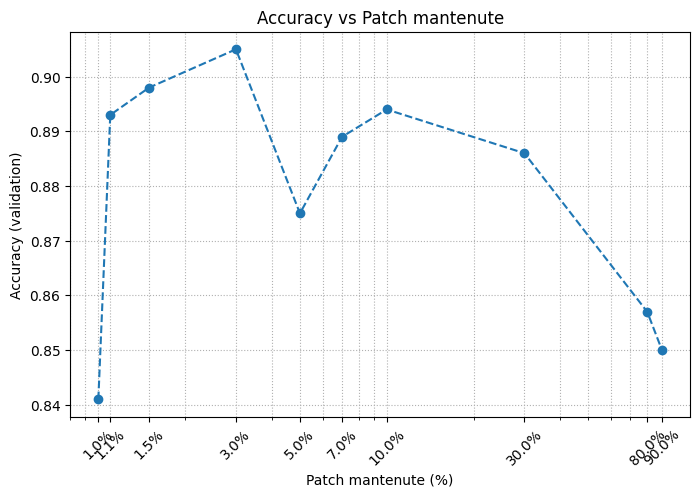

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Carica il CSV
df_raw = pd.read_csv("wandb_results.csv", header=None,
                     names=["run_name", "min_val_loss", "val_acc_at_min_loss"])

# 2) Estrai la percentuale di patch mantenute
df_raw["patch_kept"] = df_raw["run_name"].str.extract(r"([0-9]+(?:\.[0-9]+)?)$").astype(float)

# 3) Crea il DataFrame con patch_kept e accuracy
df = df_raw.loc[:, ["patch_kept", "val_acc_at_min_loss"]].rename(columns={"val_acc_at_min_loss": "accuracy"})

# 🔹 Converti accuracy in float, arrotonda e rimuovi NaN
df["accuracy"] = pd.to_numeric(df["accuracy"], errors="coerce").round(3)
df = df.dropna()

# 4) Aggiungi percentuale di patch mantenute
df["patch_kept_pct"] = df["patch_kept"] * 100

# 5) Ordina per percentuale di patch
df = df.sort_values("patch_kept")

# --- DF finale ---
print(df[["patch_kept", "accuracy"]])

plt.figure(figsize=(8,5))
plt.plot(df["patch_kept"], df["accuracy"], marker="o", linestyle="--")
plt.xscale("log")
plt.xlabel("Patch mantenute (%)")
plt.ylabel("Accuracy (validation)")
plt.title("Accuracy vs Patch mantenute")
plt.xticks(df["patch_kept"], [f"{x*100:.1f}%" for x in df["patch_kept"]], rotation=45)
plt.grid(True, which="both", linestyle=":")
plt.show()

